### Use case 1 📊🗺️
## Time series analysis of ice extend in Eidfjord, southern Norway

<img src="images/Eidfjord.jpg"/>

This notebook gives an example on how to use the ARLIE data. We use an area around Eidfjord in southern Norway for this example, however, you can simply use your own area instead.

In this notebook, we will cover the following steps:
1) Load ARLIE data and geometries into dataframes
2) Plot ARLIE time series
3) Visualise EU Hydro lakes on a map
4) Examine annual differences in lake ice extend

Before you start, make sure you have the following Python libraries installed:

In [1]:
%pip install pandas
%pip install matplotlib
%pip install pyplot
%pip install contextily

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1) Load ARLIE statistics and geometries into dataframes

In [1]:
# Import relevant libraries
import os
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

In [2]:
# Read ARLIE data from CSV file into a DataFrame
arlie = pd.read_csv('output/arlie.csv', parse_dates=["datetime"])
arlie["month"] = arlie["datetime"].dt.month

# Display the first 5 rows of the DataFrame
arlie.head()

,Unnamed: 0,id,river_km_id,datetime,water_perc,ice_perc,other_perc,cloud_perc,nd_perc,qc,source,year,month
0,0,1,378906,2017-01-01 05:48:00,67,0,0,0,33,2,Sentinel-1,2017,1
1,1,2,378888,2017-01-01 05:48:00,85,0,0,0,15,2,Sentinel-1,2017,1
2,2,3,378927,2017-01-01 05:48:00,91,0,0,0,9,2,Sentinel-1,2017,1
3,3,4,378991,2017-01-01 05:48:00,71,8,0,0,21,2,Sentinel-1,2017,1
4,4,5,378996,2017-01-01 05:48:00,91,0,0,0,9,2,Sentinel-1,2017,1


In [3]:
# Read EU Hydro geometries from CSV file
geometries = pd.read_csv('output/geometries.csv', delimiter=";")
geometries['geometry'] = geometries['geometry'].apply(loads)

# Add the geometries to a GeoDataFrame
geometries = gpd.GeoDataFrame(geometries, geometry='geometry', crs='EPSG:3035')

# Display the GeoDataFrame
geometries.head()

,id,geometry,basin_name,eu_hydro_id,object_nam,area,river_km
0,379338,"MULTIPOLYGON (((4164983.064 4162193.428, 41649...",Vorma,IW40032787,UNK,19931.63,NaN
1,379412,"MULTIPOLYGON (((4163971.649 4163710.841, 41639...",Vorma,IW40032861,UNK,20109.02,NaN
2,379666,"MULTIPOLYGON (((4163542.631 4168932.734, 41635...",Vorma,IW40033115,UNK,20765.77,NaN
3,379927,"MULTIPOLYGON (((4168470.905 4174170.158, 41684...",Vorma,IW40033376,UNK,28225.79,NaN
4,379866,"MULTIPOLYGON (((4163919.531 4172605.933, 41638...",Vorma,IW40033315,UNK,44720.36,NaN


In [4]:
# Calculate simple statistics like mean. If you like, try to change .mean() to .max() or .median()
print('Monthly mean ice cover in 2019:')
arlie[arlie['year'] == 2019]['ice_perc'].groupby(arlie['month']).mean()

Monthly mean ice cover in 2019:


month
1     30.815167
2     25.948973
3     22.724849
4     36.685142
5     13.659898
6      7.636792
7      7.596795
8      7.898117
9      8.321727
10    14.329575
11    30.548501
12    20.893484
Name: ice_perc, dtype: float64

### 2) Plot ARLIE time series

In [5]:
# Import relevant libraries
import matplotlib
from matplotlib import pyplot as plt
import calendar
import random
from matplotlib.cm import get_cmap
import contextily as ctx

In [6]:
# Select the ten biggest lakes based on the column "area"
biggest_lakes = geometries.nlargest(10, "area")
biggest_lakes_id = biggest_lakes.id.values
print("Those are the ten biggest lakes in our AOI:")
print(biggest_lakes)

Those are the ten biggest lakes in our AOI:
         id                                           geometry basin_name  \
325  383023  MULTIPOLYGON (((4179716.786 4151053.462, 41797...      Vorma   
7    383061  MULTIPOLYGON (((4161718.097 4164425.145, 41617...      Vorma   
19   378922  MULTIPOLYGON (((4161869.395 4150560.755, 41618...      Vorma   
140  382931  MULTIPOLYGON (((4188021.406 4174676.465, 41879...      Vorma   
180  382909  MULTIPOLYGON (((4194066.659 4153258.584, 41940...      Vorma   
169  382921  MULTIPOLYGON (((4184356.240 4168372.327, 41843...      Vorma   
251  382924  MULTIPOLYGON (((4166133.476 4170408.463, 41661...      Vorma   
262  382913  MULTIPOLYGON (((4188114.984 4160298.321, 41881...      Vorma   
83   379314  MULTIPOLYGON (((4171446.734 4161417.791, 41713...      Vorma   
270  379073  MULTIPOLYGON (((4190308.698 4157383.826, 41903...      Vorma   

    eu_hydro_id object_nam         area  river_km  
325  IW40036472        UNK  10339655.29       NaN  
7   

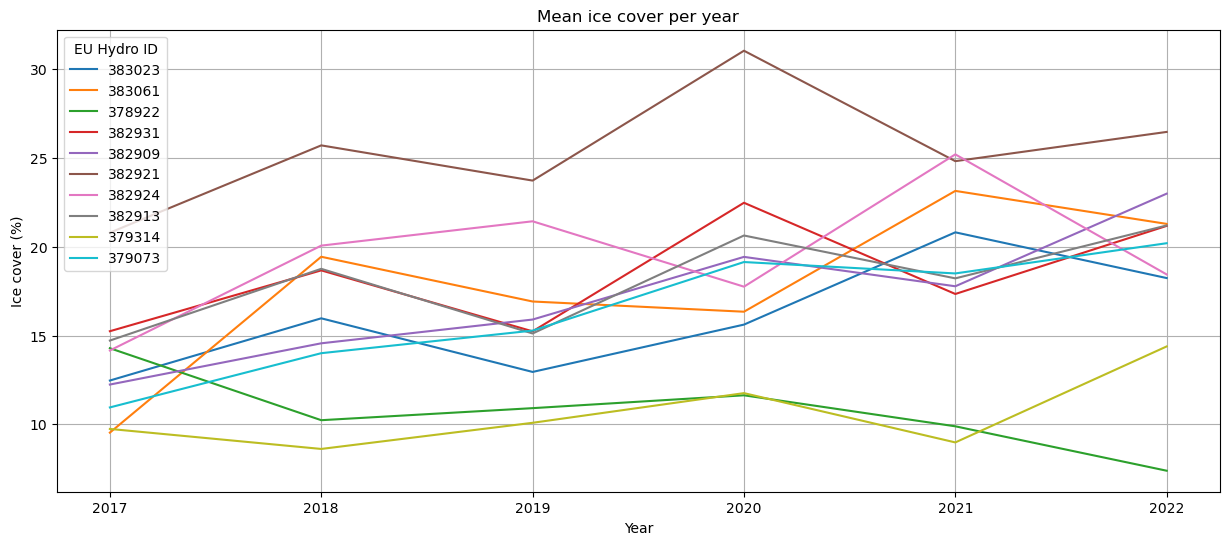

In [7]:
# Plot the mean ice cover for those ten lakes
plt.figure(figsize=(15, 6))

for river_km_id in biggest_lakes_id:
    annual_mean = arlie[arlie['river_km_id'] == river_km_id].groupby('year')['ice_perc'].mean()
    plt.plot(annual_mean.index, annual_mean.values, linestyle='-', label=f'{river_km_id}')

plt.title('Mean ice cover per year')
plt.xlabel('Year')
plt.ylabel('Ice cover (%)')
plt.grid(True)
plt.legend(title="EU Hydro ID")
plt.show()

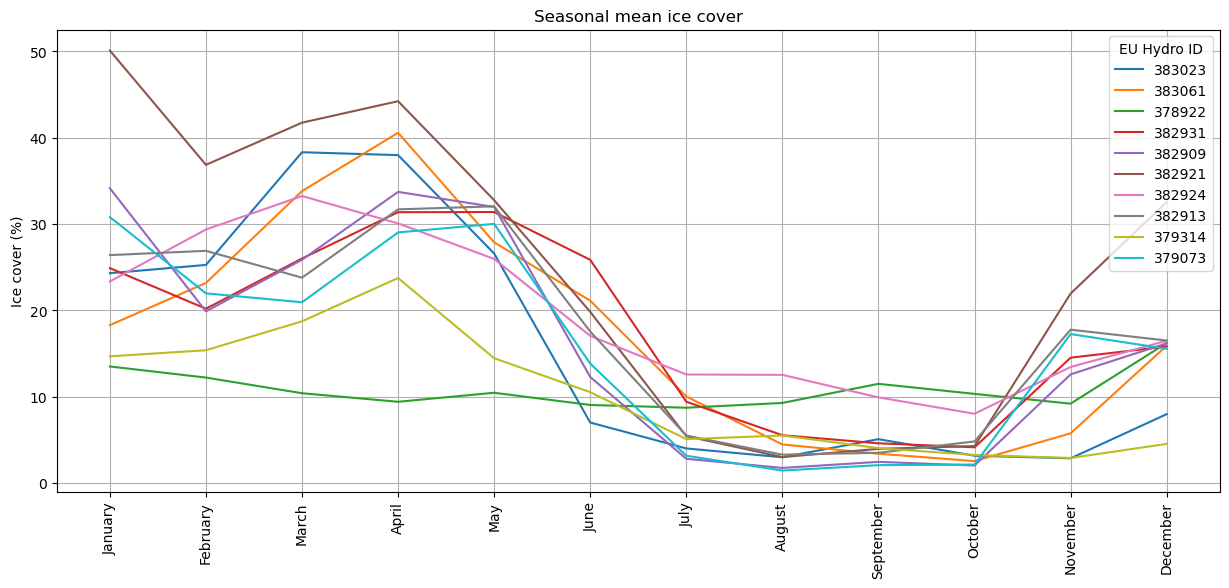

In [8]:
# Plot the seasonal ice cover for those ten lakes
plt.figure(figsize=(15, 6))

for i, river_km_id in enumerate(biggest_lakes_id):
    seasonal_mean = arlie[arlie['river_km_id'] == river_km_id].groupby('month')['ice_perc'].mean()
    seasonal_mean = seasonal_mean.sort_index()
   
    month_names = [calendar.month_name[month] for month in seasonal_mean.index]      
    plt.plot(month_names, seasonal_mean.values, linestyle='-', label=f'{river_km_id}')

plt.title('Seasonal mean ice cover')
plt.ylabel('Ice cover (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='EU Hydro ID', loc='upper right')
plt.show()

#### 3) Visualise EU Hydro lakes on a map
The Lake with ID 378922 (green line) seems to have a much more stable ice cover both through the seasons and the years than the others. Lets display their geometries on a map to find out why!

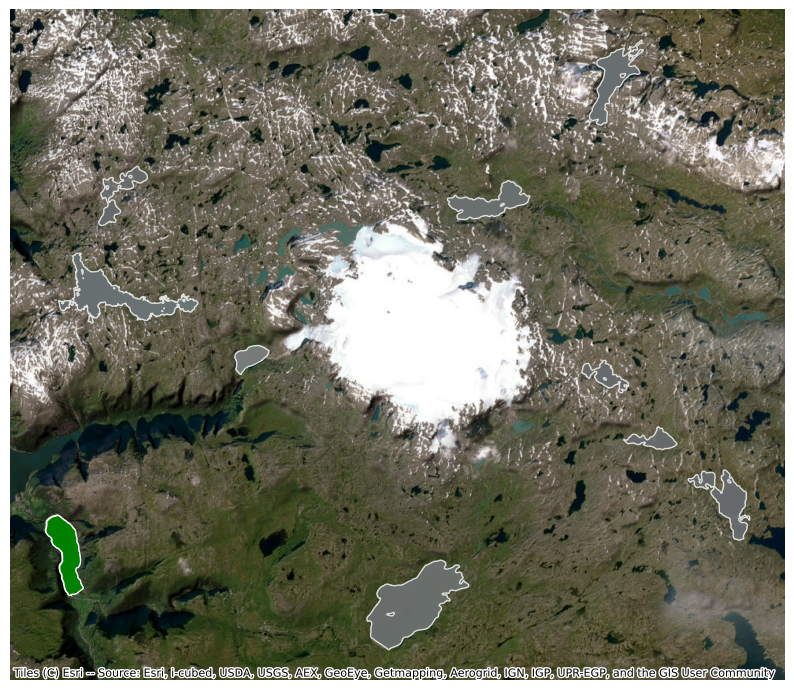

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

biggest_lakes.to_crs('EPSG:3857').plot(ax=ax, color="gray", alpha=0.8, edgecolor= 'white')
biggest_lakes[biggest_lakes["id"]==378922].to_crs('EPSG:3857').plot(ax=ax, color='green',edgecolor= 'white')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
ax.axis('off')

plt.show()

Looks like the lake is located closely to a Fjord, this might be the explanation, why the ice cover is more stable compared to the surrounding lakes 🤔

### 3) Examine annual differences in lake ice extend
Lets dig a bit deeper into the data and look at the annual differences for all lakes within the AOI

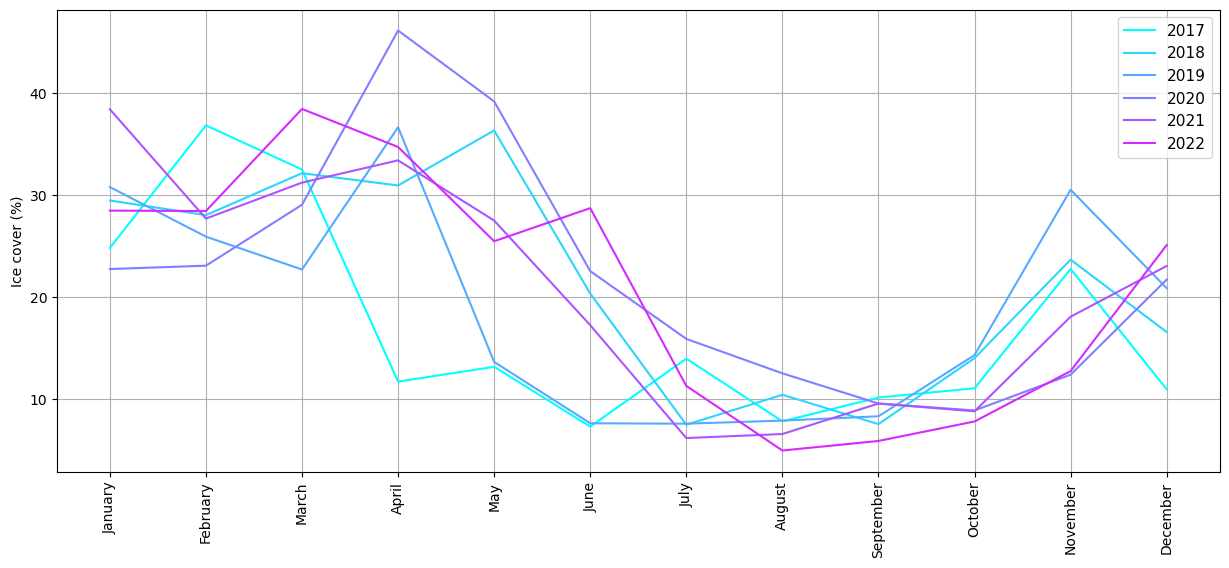

In [10]:
# you can try to change the .mean() to .max() or .median() to display different statistics
years = [2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(15, 6))

for i,year in enumerate(years):
    annual_average = arlie[arlie['year'] == year]['ice_perc'].groupby(arlie['month']).mean()
    
    month_names = [calendar.month_name[month] for month in annual_average.index]  
    line_color = matplotlib.colormaps['cool'](i / len(years))

    plt.plot(month_names, annual_average.values, linestyle='-', label=f'{year}', color=line_color)

#plt.title('Seasonal ice cover - Mean')
plt.xticks(rotation=90)
plt.ylabel('Ice cover (%)')
plt.grid(True)
plt.legend(loc='upper right', fontsize=11,  title_fontsize=12)
plt.show()

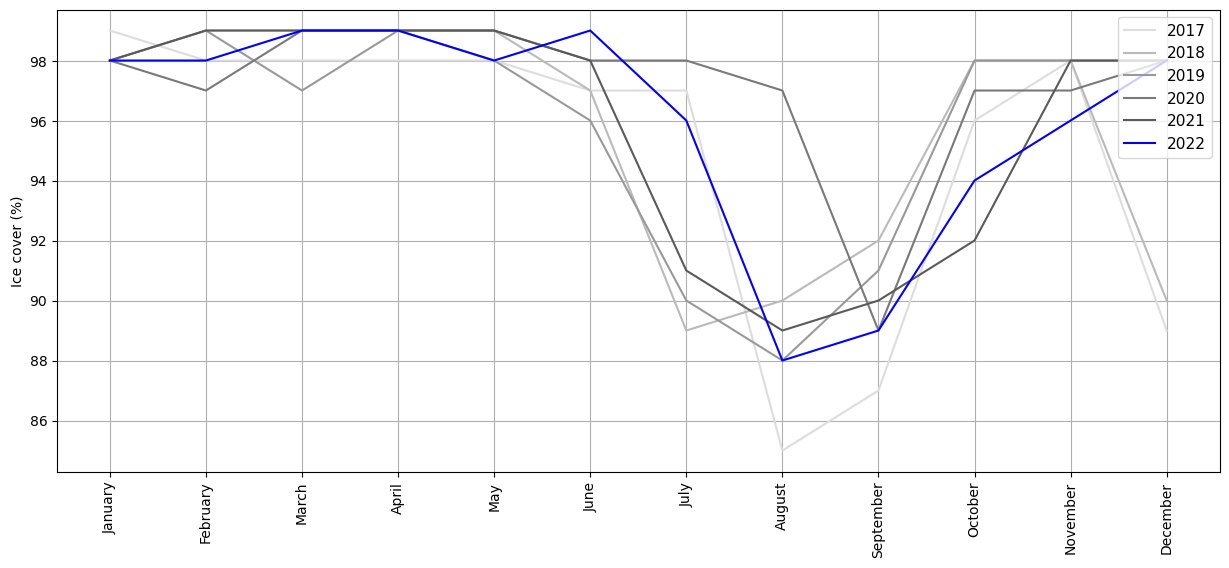

In [11]:
# Year 2022 had very low max ice cover in August, lets focus on this year:
years = [2017, 2018, 2019, 2020, 2021, 2022]
plt.figure(figsize=(15, 6))
grayscale_palette = ['#dddddd', '#bababa', '#999999', '#797979', '#5a5a5a', '#3d3d3d', '#222222']

for i, year in enumerate(years):
    annual_average = arlie[arlie['year'] == year]['ice_perc'].groupby(arlie['month']).max()
    
    month_names = [calendar.month_name[month] for month in annual_average.index]
    
    # Set the color to blue for the year 2022, and grayscale for other years
    line_color = 'blue' if year == 2022 else grayscale_palette[i % len(grayscale_palette)]
    
    plt.plot(month_names, annual_average.values, linestyle='-', label=f'{year}', color=line_color)

plt.xticks(rotation=90)
plt.ylabel('Ice cover (%)')
plt.grid(True)
plt.legend(loc='upper right', fontsize=11, title_fontsize=12)
plt.show()

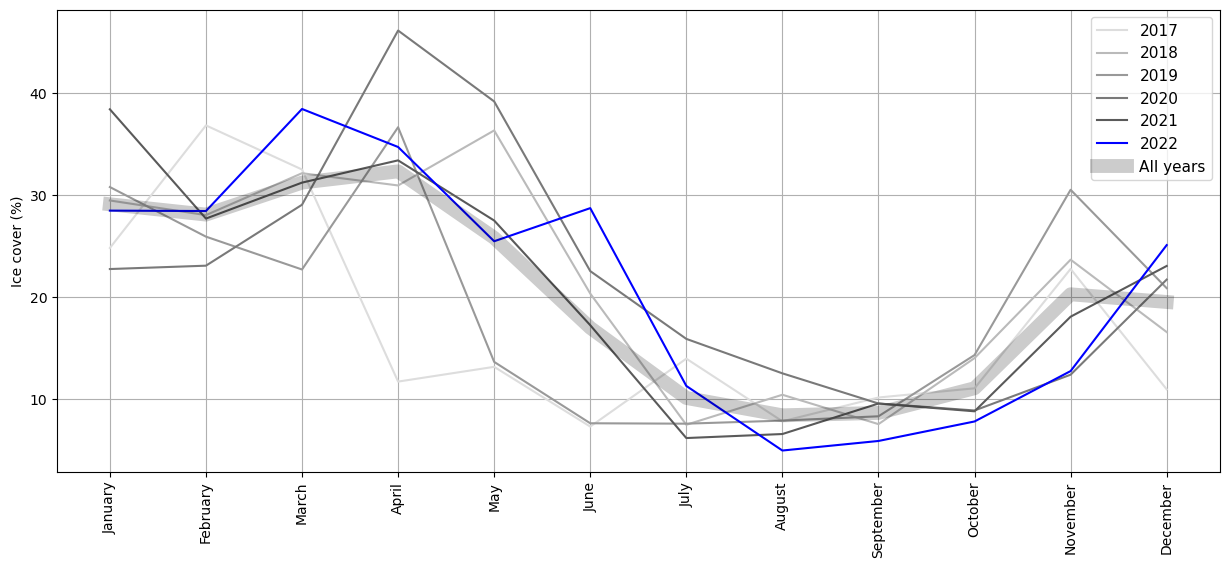

In [12]:
# We can also compare a mean of all years against individual years. To highlight a specific year, just change the year in line 22 below.
plt.figure(figsize=(15, 6))
grayscale_palette = ['#dddddd', '#bababa', '#999999', '#797979', '#5a5a5a', '#3d3d3d', '#222222']
average_all_years = arlie['ice_perc'].groupby(arlie['month']).mean()

for i, year in enumerate(years):
    annual_average = arlie[arlie['year'] == year]['ice_perc'].groupby(arlie['month']).mean()
    
    month_names = [calendar.month_name[month] for month in annual_average.index]
    
    # Set the color to blue for the year 2020, and grayscale for other years
    line_color = 'blue' if year == 2022 else grayscale_palette[i % len(grayscale_palette)]
    
    plt.plot(month_names, annual_average.values, linestyle='-', label=f'{year}', color=line_color)
plt.plot(average_all_years.values, linestyle='-', color='Black', label='All years',  linewidth=10, alpha=0.2)

plt.xticks(rotation=90)
plt.ylabel('Ice cover (%)')
plt.grid(True)
plt.legend(loc='upper right', fontsize=11, title_fontsize=12)
plt.show()

You now learned how to visualize the EU Hydro lakes for your AOI on a map, how to  extract simple statistics from the ARLIE data, and how to examine annual differences in lake ice extend.
If you are curios to learn more about data quality, try go ahead with use case 2! 🏃